In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importimg dataset
df=pd.read_excel('data_final.xlsx')
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
df.shape

(100, 3)

In [5]:
df.describe(include='all')

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [6]:
df.isna().sum()

observation    0
feature        0
price          0
dtype: int64

In [7]:
df.duplicated().sum()

0

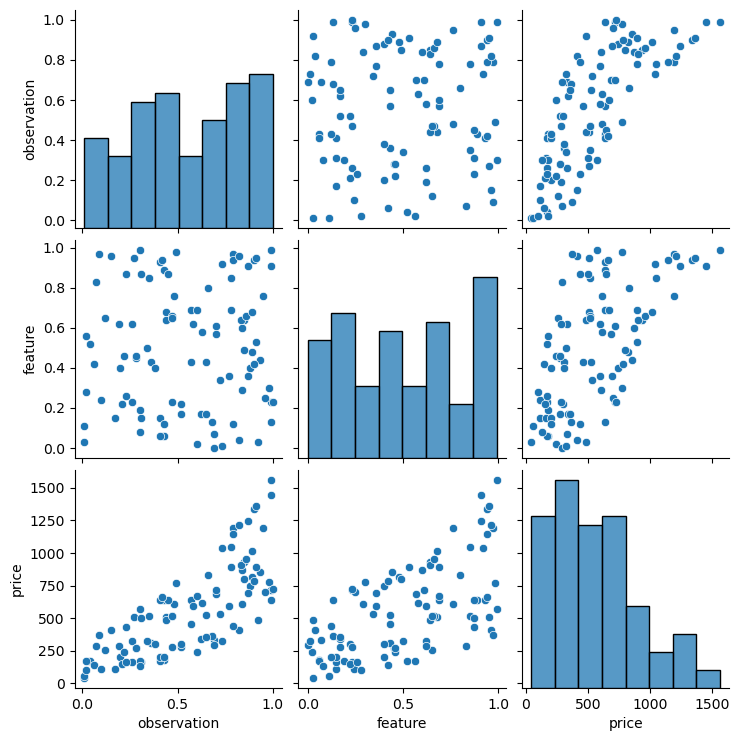

In [8]:
sns.pairplot(df)

- we can see price has polynomial dependency on observation and feature

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
x

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15,

In [11]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [19]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
y=ms.fit_transform(x)

In [20]:
#model building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [23]:
#model building
from sklearn.preprocessing import PolynomialFeatures
reg=PolynomialFeatures(degree=3)
poly=reg.fit_transform(x)
reg.fit(poly,y)
model1=LinearRegression()
model1.fit(poly,y)

LinearRegression()

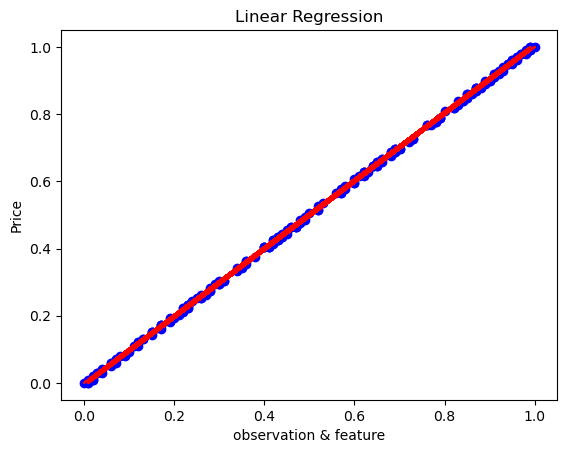

In [26]:
#plotting the graph of linear
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Linear Regression')
plt.xlabel('observation & feature')
plt.ylabel('Price')
plt.show()

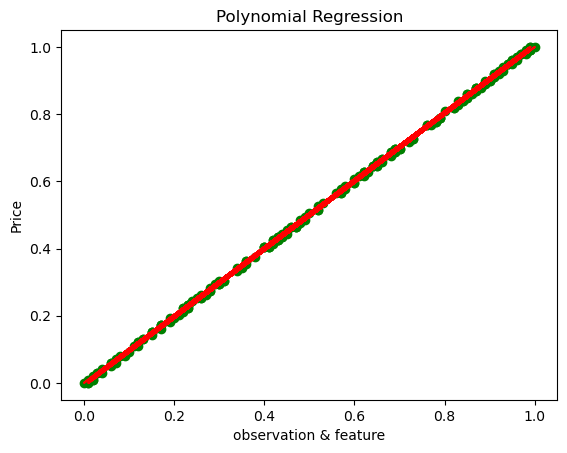

In [27]:
#plotting the graph of polynomial
plt.scatter(x, y, color='green')
plt.plot(x, model1.predict(reg.fit_transform(x)), color='red')
plt.title('Polynomial Regression')
plt.xlabel('observation & feature')
plt.ylabel('Price')
plt.show()

In [37]:
y_pred=model.predict([[2,3]])
print(y_pred)

[[2.01010101 3.03030303]]


In [42]:
y_pred1=model1.predict(reg.fit_transform([[2,3]]))
print(y_pred1)

[[2.01010101 3.03030303]]


In [44]:
#accuracy of model
model.score(x,y)

1.0